# Visualisation des meilleures destinations et des hotels

In [ ]:
import pandas as pd 

import plotly.express as px
import plotly.io as pio

from utils import (
    read_df_from_jsonlines
)

from config import (
    CITIES_GEO_LOCATION_CSV_PATH,
    CITIES_WEATHER_FORECAST_CSV_PATH,
    CITIES_GEO_LOCATION_AND_SCORE_CSV_PATH,
    BEST_HOTELS_OF_CITIES_JSON_PATH,
)

# Allow to view a preview image within Github
pio.renderers.default = "jupyterlab+png"

Data folder: /workspaces/jedha-cdsd-cert-projects/bloc-1/kayak/data


## Chargement des données

In [2]:
cities_df = pd.read_csv(CITIES_GEO_LOCATION_CSV_PATH)
hotels_df = read_df_from_jsonlines(BEST_HOTELS_OF_CITIES_JSON_PATH)

hotels_df = hotels_df.astype({
    "geo_latitude": "float64",
    "geo_longitude": "float64",
})

print(f"Nb cities with hotels: {len(hotels_df['city_id'].unique())}")

cities_weather_forecast_df = pd.read_csv(CITIES_WEATHER_FORECAST_CSV_PATH)
cities_and_score_df = pd.read_csv(CITIES_GEO_LOCATION_AND_SCORE_CSV_PATH)

Nb cities with hotels: 35


## Top 5

In [3]:
t_mean = cities_and_score_df["mean_temp"].mean()

warmer_df = cities_and_score_df[cities_and_score_df["mean_temp"] >= t_mean]
rainless_df = warmer_df.sort_values("mean_pop", ascending=True)

top_5_df = rainless_df.head(5).reset_index(drop=True)
top_5_df["mean_not_pop"] = 100 - top_5_df["mean_pop"]

print("Best destinations for upcoming days:")
display(top_5_df)

Best destinations for upcoming days:


,id,name,latitude,longitude,mean_temp,min_pop,mean_pop,max_pop,mean_not_pop
0,22,Aix en Provence,43.529842,5.447474,18.72,0.0,3.75,12.75,96.25
1,23,Avignon,43.949249,4.805901,19.55,0.0,4.31,13.12,95.69
2,20,Cassis,43.214036,5.539632,16.37,0.0,4.58,15.00,95.42
3,21,Marseille,43.296174,5.369953,17.34,0.0,4.58,15.00,95.42
4,27,Saintes Maries de la mer,43.451592,4.427720,16.10,0.0,5.77,15.00,94.23


### Preview Top 5

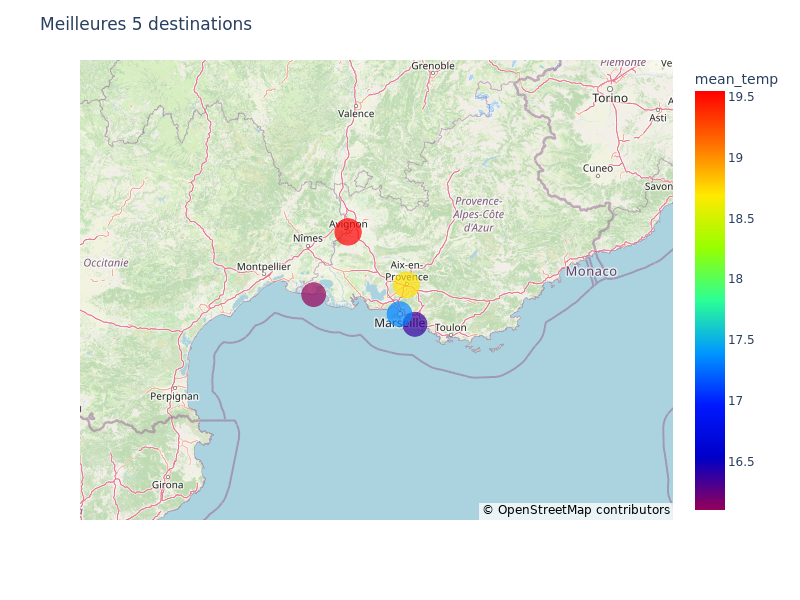

In [4]:
fig = px.scatter_map(
    top_5_df,
    lat="latitude",
    lon="longitude",
    hover_data="name",
    color="mean_temp",
    size="mean_temp",
    color_continuous_scale=px.colors.sequential.Rainbow,
    map_style="open-street-map",
    zoom=6,
    height=600,
    width=800
)

fig.update_geos(fitbounds="locations")

fig.update_layout(
    title="Meilleures 5 destinations",
)
fig.show()

## Meilleurs hotels par destination

In [5]:
def plot_hotels(destination_df, destination_hotels_df):
    dest_name = destination_df.iloc[0]['name']
    dest_temp = destination_df.iloc[0]['mean_temp']

    rank_color_scale = [(0, '#F6222E'), (1,'#16FF32')]

    fig = px.scatter_map(
        destination_hotels_df, 
        lat="geo_latitude", 
        lon="geo_longitude", 
        color="review_score", 
        map_style="open-street-map", 
        color_continuous_scale = rank_color_scale,
        zoom = 16,
        height = 600,
        width = 800,
        size = "review_score",
        text="name",
        # hover_data="description"
    )
    fig.update_layout(
        title = f"Hotels à {dest_name} ({dest_temp}°C)",
    )
    fig.show()

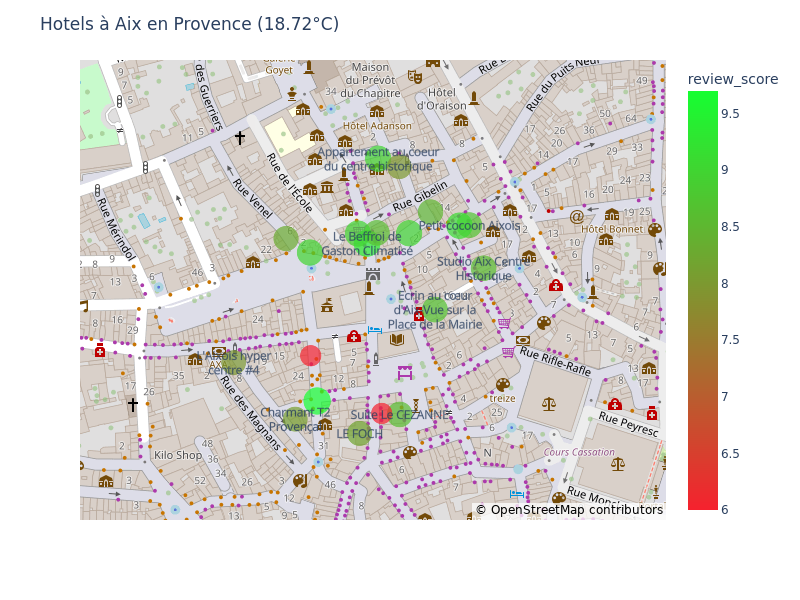

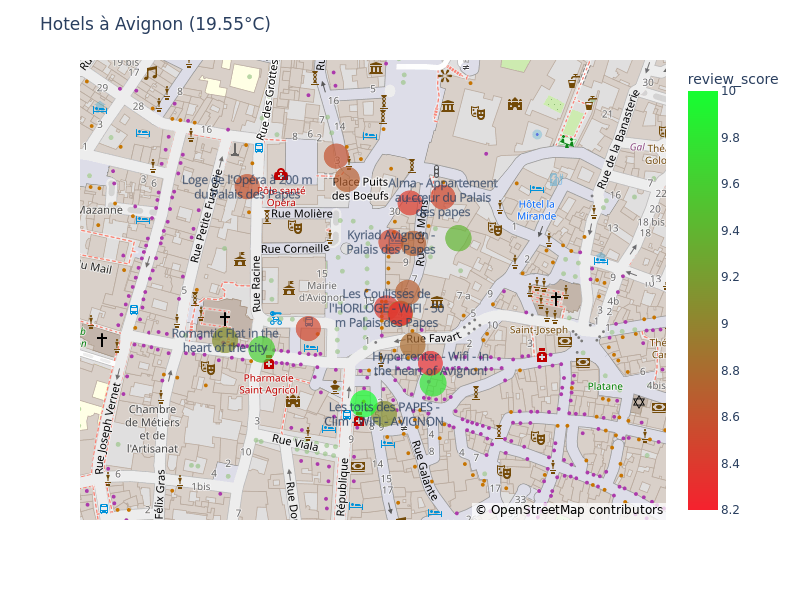

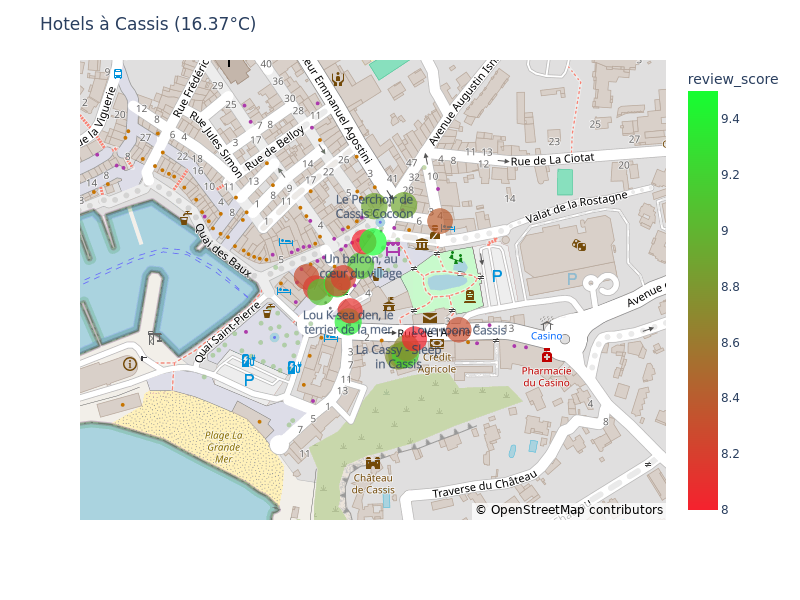

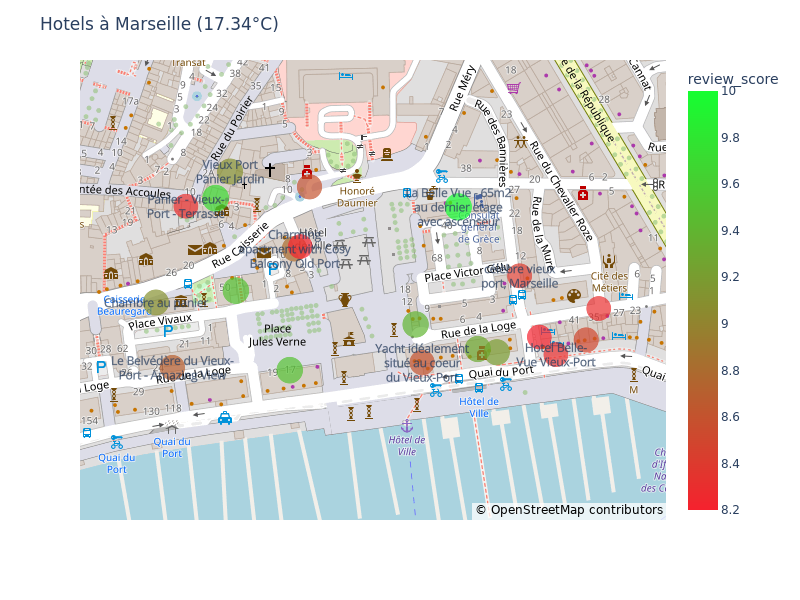

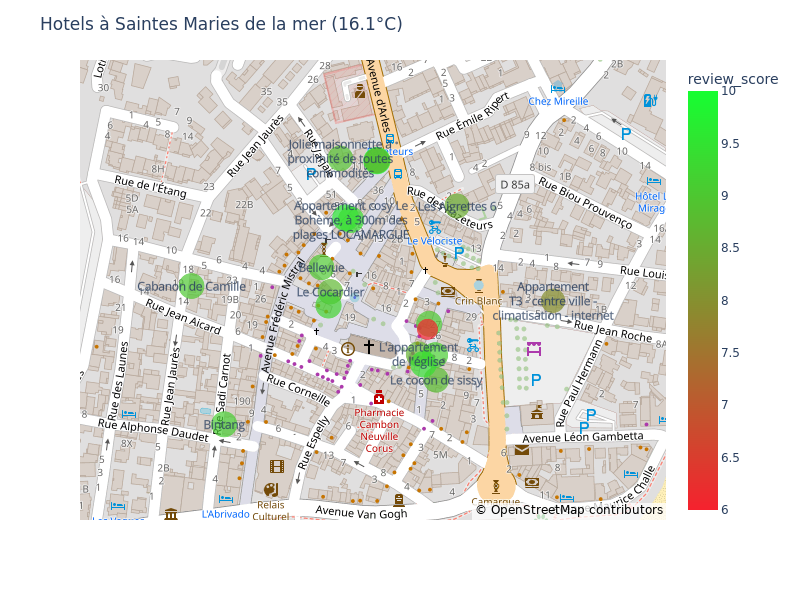

In [6]:
# Ensure a score is set
hotels_df["review_score"] = pd.to_numeric(hotels_df["review_score"])
hotels_df["review_score"] = hotels_df["review_score"].fillna(hotels_df["rating_squares"]*2)

for city_id in top_5_df['id']:
    # print(city_id)
    # display(hotels_df[hotels_df['city_id']==city_id])
    plot_hotels(top_5_df[top_5_df['id']==city_id], hotels_df[hotels_df['city_id']==city_id])
